In [38]:
%matplotlib inline

In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.00,high=90.00,size=1500)
lngs = np.random.uniform(low=-180.00,high=180.00,size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
coordinates =list(lat_lngs)

In [4]:
cities =[]

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    if city not in cities:

        cities.append(city)

len(cities)

633

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
city_data = []

print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters

record_count = 1
set_count = 1


# Loop through all the cities in the list

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):

        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city

    city_url = url + "&q=" + city.replace(" ","+")


    # Log the url, record, and set numbers and the city

    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | wenling
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | akureyri
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | bima
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | pestyaki
Processing Record 19 of Set 1 | panjab
Processing Record 20 of Set 1 | ituni
City not fo

In [9]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,78.94,55,100,8.05,US,2022-07-16 23:23:12
1,San Patricio,28.0170,-97.5169,93.18,45,6,16.58,US,2022-07-16 23:26:40
2,Wenling,28.3669,121.3600,81.00,92,98,7.18,CN,2022-07-16 23:26:40
3,Broome,42.2506,-75.8330,80.85,59,0,6.91,US,2022-07-16 23:24:35
4,Albany,42.6001,-73.9662,81.34,53,100,1.01,US,2022-07-16 23:24:47


In [10]:
new_column_order = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,100,US,2022-07-16 23:23:12,55,42.0970,-79.2353,78.94,8.05
1,San Patricio,6,US,2022-07-16 23:26:40,45,28.0170,-97.5169,93.18,16.58
2,Wenling,98,CN,2022-07-16 23:26:40,92,28.3669,121.3600,81.00,7.18
3,Broome,0,US,2022-07-16 23:24:35,59,42.2506,-75.8330,80.85,6.91
4,Albany,100,US,2022-07-16 23:24:47,53,42.6001,-73.9662,81.34,1.01


In [11]:
# Output file
output_data_file = 'weather_data/cities.csv'

# export the df to csv
city_data_df.to_csv(output_data_file,index_label="City_ID")

# Plotting

In [22]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

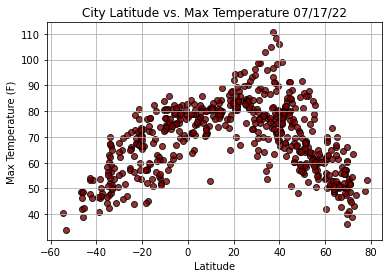

In [23]:
plt.scatter(lats,
            max_temps,
            edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities',color='maroon')

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

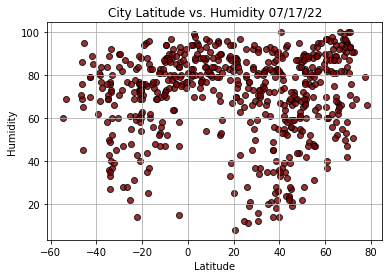

In [24]:
plt.scatter(lats,
            humidity,
            edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities',color='maroon')

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

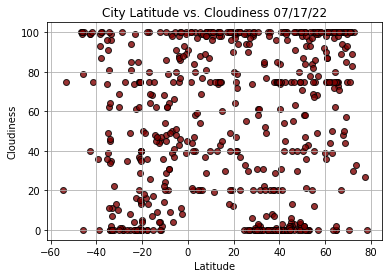

In [25]:
plt.scatter(lats,
            cloudiness,
            edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities',color='maroon')

plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

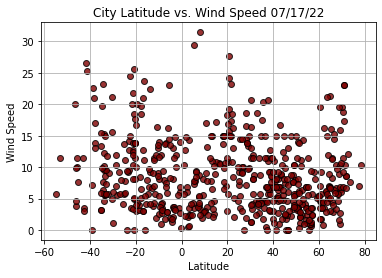

In [26]:
plt.scatter(lats,
            wind_speed,
            edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities',color='maroon')

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):

    # Run regression on hemisphere data

    (slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)

    # Calculate regression line 'y values' from slope and intercept

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,'maroon')

    plt.annotate(line_eq,text_coordinates,fontsize=14,color='maroon')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    plt.show()


In [30]:
index13 = city_data_df.loc[13]
index13

City                     Pestyaki
Cloudiness                     78
Country                        RU
Date          2022-07-16 23:26:44
Humidity                       65
Lat                       56.7103
Lng                       42.6717
Max Temp                    60.42
Wind Speed                   0.56
Name: 13, dtype: object

In [32]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,100,US,2022-07-16 23:23:12,55,42.0970,-79.2353,78.94,8.05
1,San Patricio,6,US,2022-07-16 23:26:40,45,28.0170,-97.5169,93.18,16.58
2,Wenling,98,CN,2022-07-16 23:26:40,92,28.3669,121.3600,81.00,7.18
3,Broome,0,US,2022-07-16 23:24:35,59,42.2506,-75.8330,80.85,6.91
4,Albany,100,US,2022-07-16 23:24:47,53,42.6001,-73.9662,81.34,1.01


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

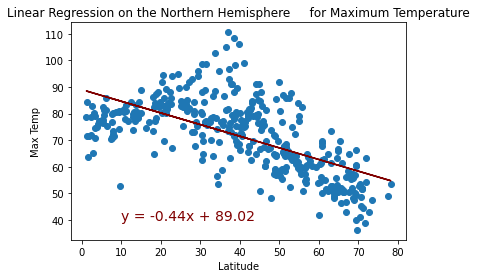

In [39]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \
    for Maximum Temperature','Max Temp',(10,40))

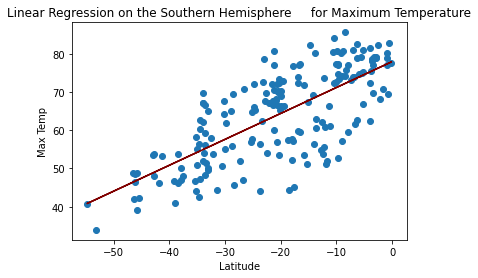

In [42]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \
    for Maximum Temperature','Max Temp',(-50,90))

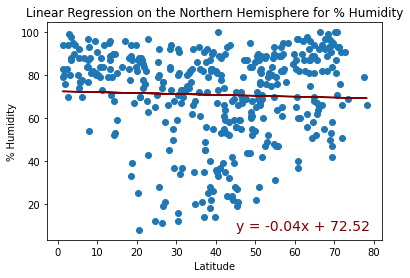

In [56]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere for % Humidity','% Humidity',(45,8))

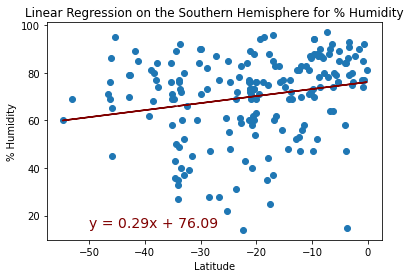

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

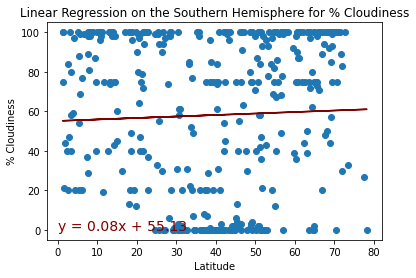

In [63]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(0,0))

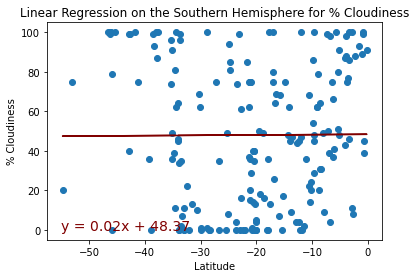

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,0))

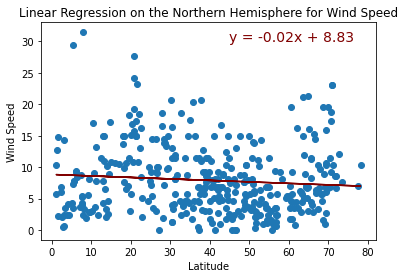

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(45,30))

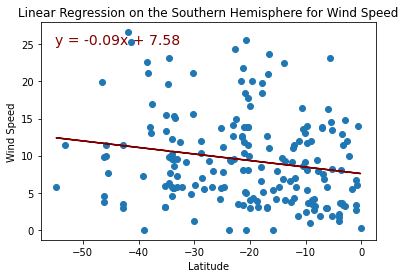

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,25))